In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.simplefilter('ignore')



In [2]:
telcom = pd.read_csv(r"Dataset.csv")
#first 5 rows
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

**Pandas didn’t detect all of the values in the ‘TotalCharges’ column to be float64 type, so we probably have some non-numeric data in the column.**

In [5]:
# convert all TotalCharges to numeric and set the invalid parsings/errors as NaN
telcom['TotalCharges'] = pd.to_numeric(telcom['TotalCharges'], errors = 'coerce')

# check the rows which have NaN in the TotalCharges column
telcom.loc[telcom['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
# we get 11 rows in the result , all of which have tenure =0
# Decision making - We can either drop these rows (as they are useless) or set the TotalCharges values to be 0. 
# Lets drop the rows.
#dataset = dataset.dropna()
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]


In [7]:
# Converting SeniorCitizen from int to categorical 
telcom['SeniorCitizen']=pd.Categorical(telcom['SeniorCitizen'])

In [8]:
# Deleting the custumerID column, contains no useful information. And we already have the pandas numerical index.
telcom.drop(['customerID'],axis=1, inplace=True)

In [9]:
telcom.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [10]:
# split the dataset into numeric and objects to facilitate the analysis:

numerics = ['float64', 'int64']
numeric_ds = telcom.select_dtypes(include=numerics)
objects_ds = telcom.select_dtypes(exclude=numerics)

In [11]:
numeric_ds.describe()


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [12]:
objects_ds.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [13]:
telcom.groupby('Churn').size()


Churn
No     5163
Yes    1869
dtype: int64

### Target variable

We will look into our target variable distribution by using categorical plot function of seaborn

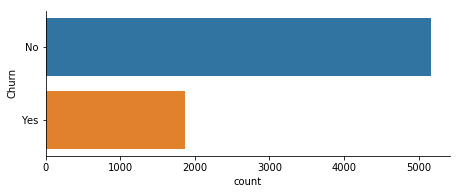

In [14]:
ax = sns.catplot(y="Churn", kind="count", data=telcom, height=2.6, aspect=2.5, orient='h')


We have a slightly unbalanced target:
Churn: No - 72.4%
Churn: Yes - 27.6%

### Numerical variables

There are only three numerical columns: tenure, monthly charges and total charges. The probability density distribution can be estimate using the **seaborn kdeplot function.**

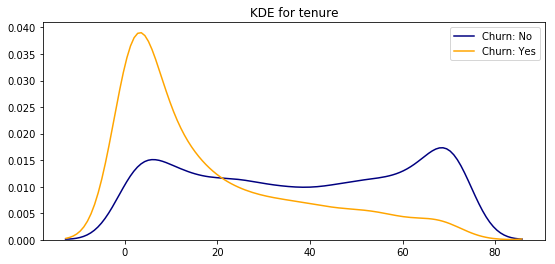

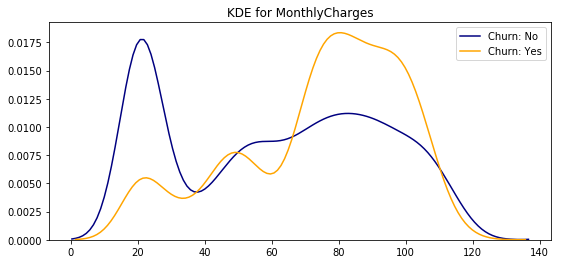

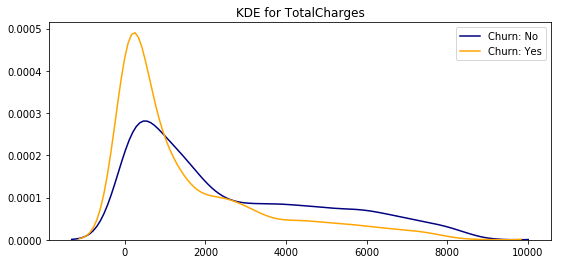

In [15]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(telcom[telcom['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(telcom[telcom['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can **conclude** that:

* Recent clients are more likely to churn
* Clients with higher MonthlyCharges are also more likely to churn
* Tenure and MonthlyCharges are probably important features

We can come to the same conclusions when we use **scatter plots**



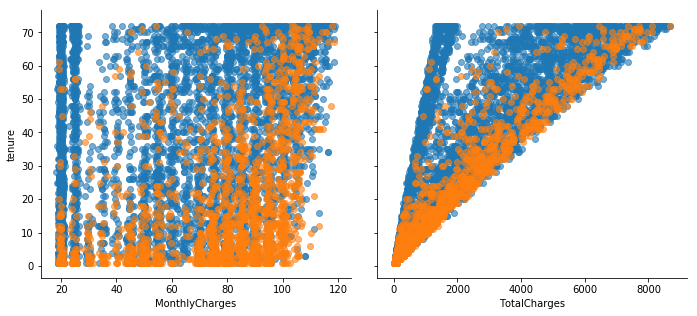

In [16]:
g = sns.PairGrid(telcom, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

### Categorical variables

This dataset has 16 categorical features:

* Six binary features (Yes/No)
* Nine features with three unique values each (categories)
* One feature with four unique values

#### Partner and dependents


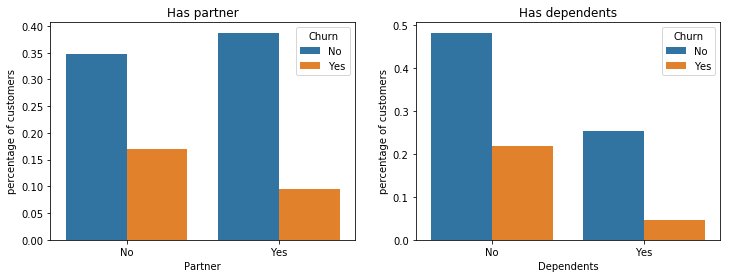

In [17]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = telcom.groupby('Partner')["Churn"].value_counts()/len(telcom)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = telcom.groupby('Dependents')["Churn"].value_counts()/len(telcom)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

From the plots above we can **conclude** that:
* Customers that doesn't have partners are more likely to churn
* Customers without dependents are also more likely to churn

#### Contract and Payment

In [19]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = telcom.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(telcom)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

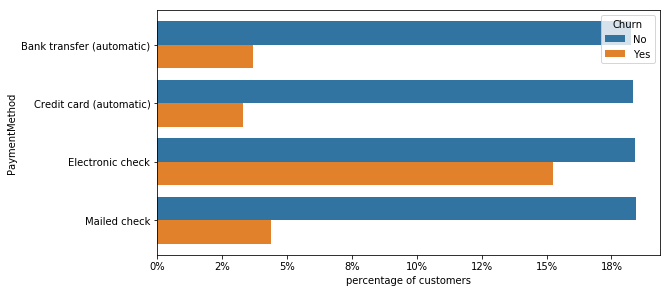

In [20]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

A few **observations**:

* Customers with paperless billing are more probable to churn
* The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate
* Short term contracts have higher churn rates
* One and two year contracts probably have contractual fines and therefore customers have to wait untill the end of contract to churn.

 These observations are important for when we design the retention campaigns so that we know where we can focus.

####  plot all categorical variables as a bar plot

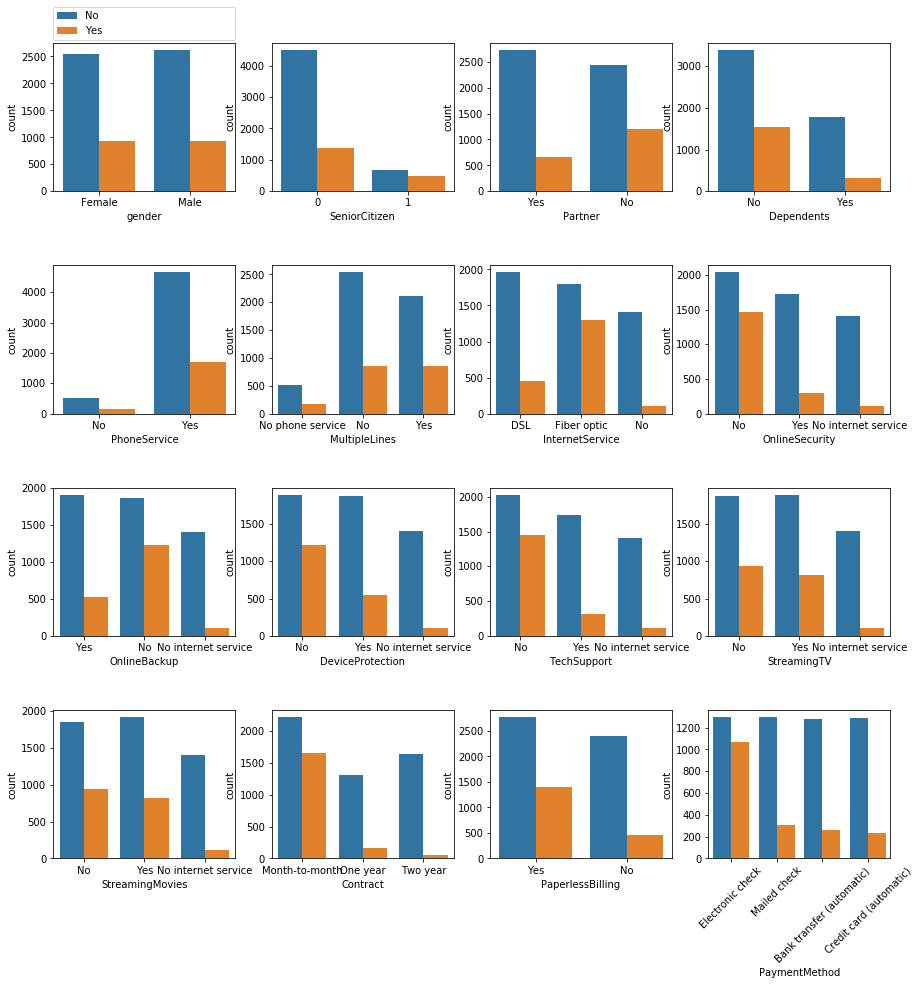

In [21]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

Now we have a better picture of the variables that are more important to us, for example, having Month-to-month contract is a strong indicator if the client might leave soon, so is the Electronic check payment method, being a senior citizen on the other hand is a good predictor but only represents a small amount of the companies clients so you might prefer to focus on the variables that delivers the best results first before tackling it.

# 4. Machine Learning Models And Performance Evaluation

We will use Logistic Regression, Decision Tree, Random Forest and SVM. First set aside a test data. 

In [22]:
# categorical variable encoding
cat_vars_list = objects_ds.columns.tolist()
## Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat_vars_list :
    telcom[i] = le.fit_transform(telcom[i])

In [23]:
## divide dataset into train and test datasets

from sklearn.model_selection import train_test_split

Y = telcom['Churn']
X = telcom.drop(columns = ['Churn'])


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=990143)

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

logisticReg = LogisticRegression()
result = logisticReg.fit(X_train, Y_train)
Y_pred_lr = logisticReg.predict(X_test)
print (Y_pred_lr)

[0 0 0 ... 0 0 0]


In [26]:
from sklearn import metrics

print (metrics.accuracy_score(Y_test, Y_pred_lr))


0.7990521327014218


In [27]:
# what is the accuracy on training data. Is it overfit?
Y_train_predict_lr = logisticReg.predict(X_train)
print (metrics.accuracy_score(Y_train, Y_train_predict_lr))


0.8043478260869565


### Confusion Matrix and Precision, Recall

Define a function to print the confusion matrix, precision and recall for a given model

In [28]:
## confusion matrix and precision recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score


def cm_and_pr(Y_pred, model_name):
    cm = confusion_matrix(Y_test, Y_pred)
    df_cm = pd.DataFrame(cm)
    ax= plt.subplot()

    classNames = ['No', 'Yes']

    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True, xticklabels=classNames, yticklabels=classNames, annot_kws={"size": 16}, fmt='g')

    ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
    ax.set_title('Confusion Matrix'); 
         
    #precision and recall
    
    # true positive - churn, predicted as 'churn'
    # true negative - no churn, predicted as 'no churn'
    # false positive - no churn, predicted as 'churn'
    # false negative - churn, predicted as 'no churn'
    # precision = tp / (tp + fp)
    # recall = tp / (tp + fn)

    precision = precision_score(Y_test, Y_pred, labels = [1], average='micro')
    recallscore = recall_score(Y_test, Y_pred, labels = [1], average='micro')

    data = [[model_name, precision, recallscore]] 


    df = pd.DataFrame(data, columns = ['Model', 'Precision', 'Recall'])
    print(df)    


                 Model  Precision    Recall
0  Logistic Regression   0.637131  0.545126


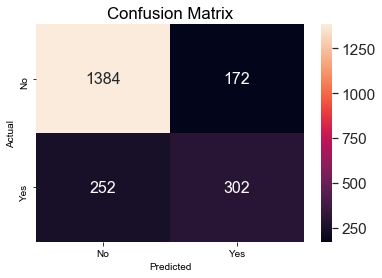

In [29]:
## logistic regression
cm_and_pr(Y_pred_lr, "Logistic Regression")

In [30]:
## 2 variable logistic regression

X_train1 = X_train[['tenure', 'MonthlyCharges']]  # we only take the first two features.

logisticReg1 = LogisticRegression()
result = logisticReg1.fit(X_train1, Y_train)

X_test1 = X_test[['tenure', 'MonthlyCharges']]

Y_test_pred_lr1 = logisticReg1.predict(X_test1)
print (metrics.accuracy_score(Y_test, Y_test_pred_lr1))


0.7748815165876777


## Decision Tree

In [31]:
## decision tree 
from sklearn import tree, metrics

dec_tree = tree.DecisionTreeClassifier()
result_tree = dec_tree.fit(X_train, Y_train)
Y_pred_dt = dec_tree.predict(X_test)
print (metrics.accuracy_score(Y_test, Y_pred_dt))

0.7355450236966825


In [32]:
# tree.score same as metrics.accuracy_score
print (dec_tree.score(X_test, Y_test))


0.7355450236966825


In [33]:
# Checking overfitting on the training data
Y_train_pred_dt = dec_tree.predict(X_train)
print (metrics.accuracy_score(Y_train, Y_train_pred_dt))

0.9985778138967899


In [34]:
## (Generalization) Pruning of tree  - put upper cap on decision tree depth
dec_tree1 = tree.DecisionTreeClassifier(max_depth = 4)
result_tree1 = dec_tree1.fit(X_train, Y_train)
Y_test_pred_dt1 = dec_tree1.predict(X_test)
print (metrics.accuracy_score(Y_test, Y_test_pred_dt1))


0.7819905213270142


In [35]:
print ("depth 4 training accuracy - ", dec_tree1.score(X_train, Y_train))

depth 4 training accuracy -  0.7830150345388054


           Model  Precision    Recall
0  Decision Tree   0.635057  0.398917


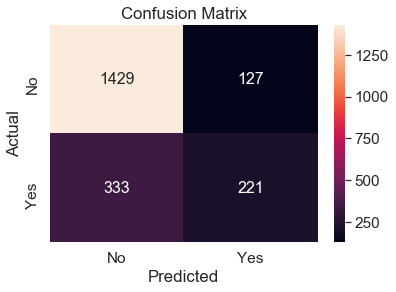

In [36]:
cm_and_pr(Y_test_pred_dt1, "Decision Tree")

## Visualizing decision tree

In [37]:

dot_data = tree.export_graphviz(dec_tree1, out_file=None, 
                                feature_names=X.columns,  
                                class_names=["No", "Yes"])

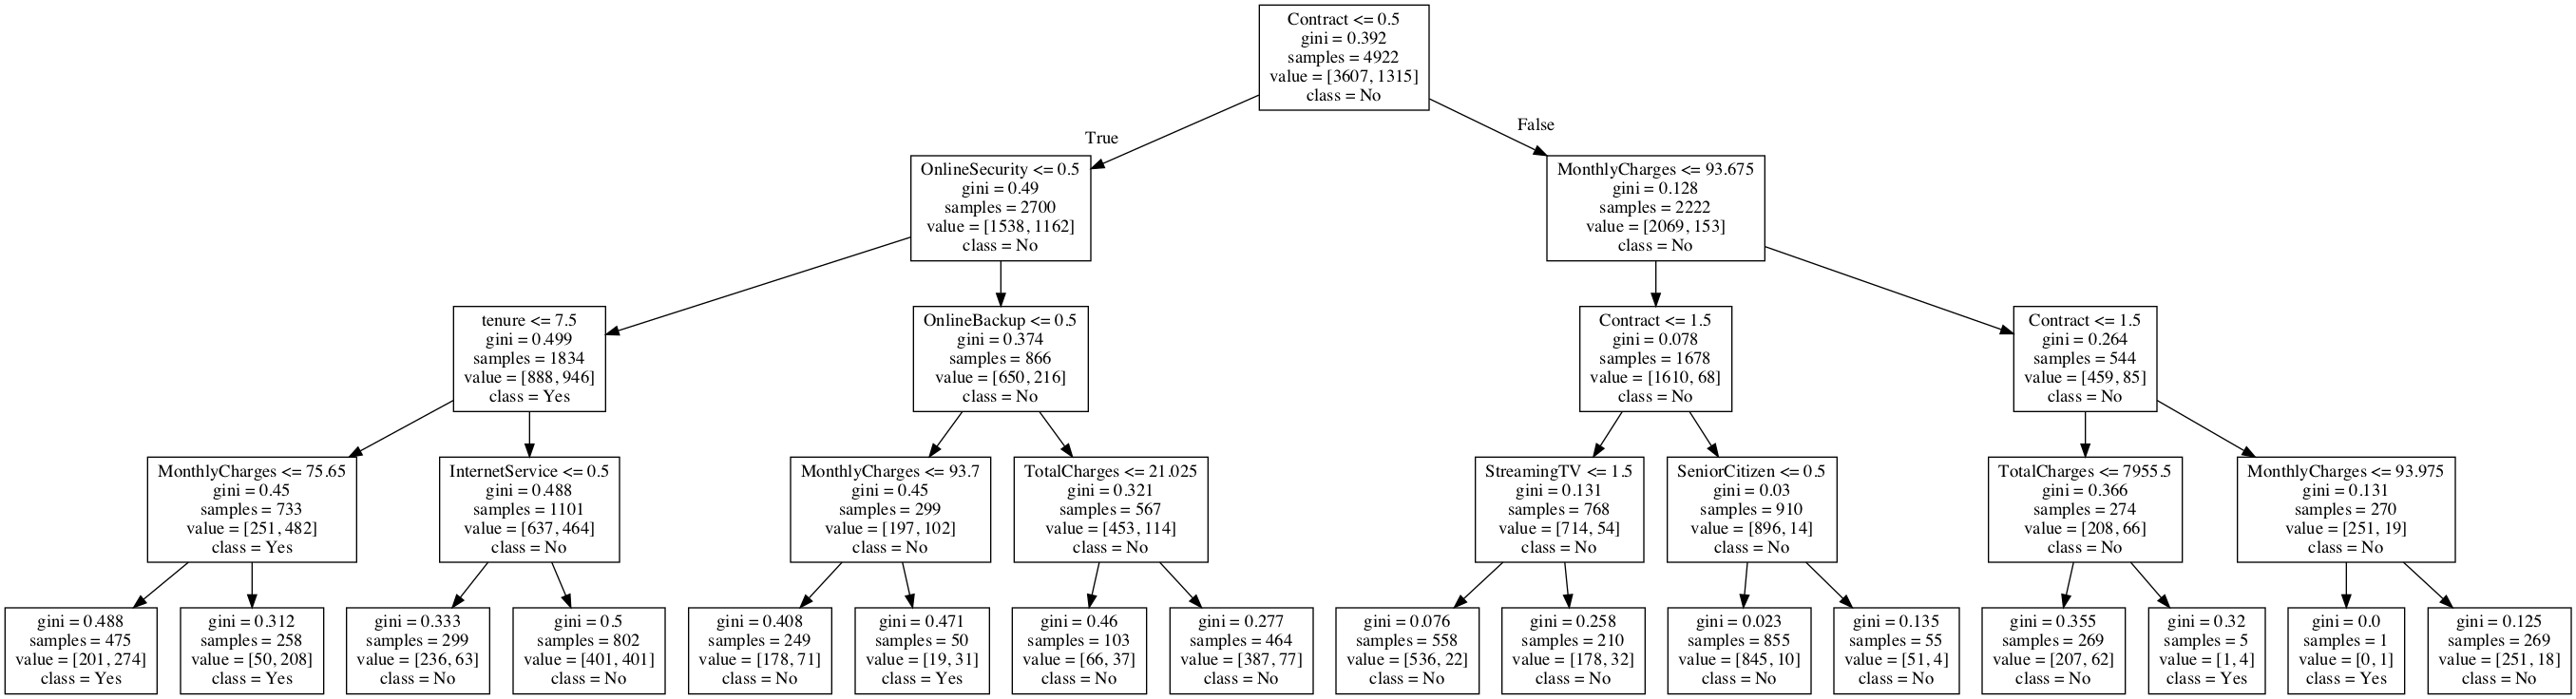

In [48]:
# Draw graph
## ** conda install graphviz python-graphviz
## conda install pydotplus

import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()
randomForest.fit(X_train, Y_train)
Y_pred_rf = randomForest.predict(X_test)

print (randomForest.score(X_test, Y_test))


0.7668246445497631


In [40]:
# Checking overfitting on the training data
print (randomForest.score(X_train, Y_train))


0.9831369362047948


In [41]:
# Random Forest - fixing overfitting
randomForest1 = RandomForestClassifier(n_estimators=4, max_depth=4) #by default is 10 (estimators are trees).
randomForest1.fit(X_train, Y_train)
Y_pred_rf1 = randomForest1.predict(X_test)

print (randomForest1.score(X_test, Y_test))

0.7895734597156399


In [42]:
# Checking overfitting on the training data
print (randomForest1.score(X_train, Y_train))


0.7966273872409589


           Model  Precision    Recall
0  Random Forest   0.643229  0.445848


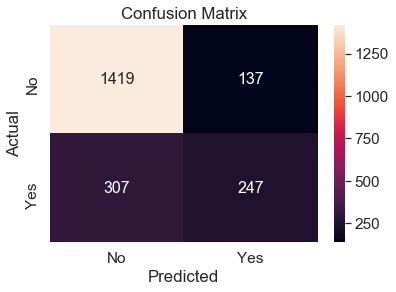

In [43]:
cm_and_pr(Y_pred_rf1, "Random Forest")

## SVM

In [44]:
from sklearn.svm import SVC

svc_cl = SVC()
svc_cl.fit(X_train, Y_train)
Y_pred_svm = svc_cl.predict(X_test)

In [45]:
# SVM
from sklearn.svm import SVC

svc_cl = SVC()
svc_cl.fit(X_train, Y_train)
Y_pred_svm = svc_cl.predict(X_test)

print (svc_cl.score(X_test, Y_test))
print (svc_cl.score(X_train, Y_train))



0.7606635071090048
0.9605851279967493


  Model  Precision    Recall
0   SVM   0.646707  0.194946


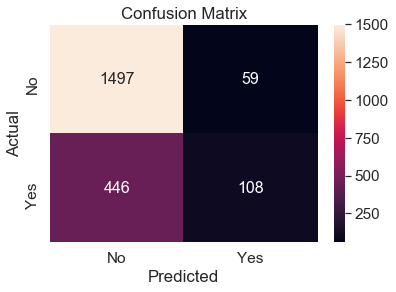

In [46]:
cm_and_pr(Y_pred_svm, "SVM")